<a href="https://colab.research.google.com/github/ToffertheCreator/colab_notebooks/blob/main/neural_network_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 68.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
!pip uninstall tensorflow keras -y
!pip install tensorflow keras

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Successfully uninstalled keras-3.4.1
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached keras-3.4.1-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
Using cached keras-3.4.1-py3-none-any.whl (1.1 MB)


In [ ]:
df = pd.read_csv('sales_train_data.csv')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.0,0.016047,4,249.8092,0.0,3,1,3735.1380
1,5.92,1.0,0.019278,8,48.2692,0.0,1,2,443.4228
2,17.50,0.0,0.016760,9,141.6180,0.0,3,1,2097.2700
3,19.20,1.0,0.000000,0,182.0950,0.0,1,0,732.3800
4,8.93,0.0,0.000000,2,53.8614,2.0,1,1,994.7052


In [ ]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu', kernel_regularizer=l2(0.003)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.003)))

#Output layer
model.add(Dense(1, activation='relu'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =350)

Epoch 1/350
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7338984.0000 - mae: 2133.9575 - val_loss: 6711880.0000 - val_mae: 1953.0942
Epoch 2/350
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5214740.5000 - mae: 1712.0751 - val_loss: 2416471.2500 - val_mae: 1118.8469
Epoch 3/350
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1959543.6250 - mae: 1021.9849 - val_loss: 1504738.5000 - val_mae: 926.8152
Epoch 4/350
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1537488.6250 - mae: 926.4110 - val_loss: 1423999.6250 - val_mae: 897.2756
Epoch 5/350
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1470126.7500 - mae: 909.8795 - val_loss: 1370511.8750 - val_mae: 879.6644
Epoch 6/350
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1425736.0000 - mae: 897.3977 - val_loss: 1350565.8750 - val_mae: 866.7021
Epoch 7/350
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1415741.2500 - mae: 883.3855 - val_loss: 1348565.8750 - val_mae: 856.1050
Epoch 8/350
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

In [ ]:
model.save('neural_network6_model.keras')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('neural_network6_model.keras')

In [ ]:
new_df = pd.read_csv('test.csv')

In [ ]:
new_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0.0,0.007565,2,107.8622,OUT049,0.0,1,1
1,FDW14,8.300000,1.0,0.038428,5,87.3198,OUT017,0.0,2,1
2,NCN55,14.600000,0.0,0.099575,13,241.7538,OUT010,0.0,3,0
3,FDQ58,7.315000,0.0,0.015388,2,155.0340,OUT017,0.0,2,1
4,FDY38,12.695633,1.0,0.118599,5,234.2300,OUT027,0.0,3,3


In [ ]:
feature_columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
identifiers = new_df[['Item_Identifier', 'Outlet_Identifier']]
X_new = new_df[feature_columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_new_scaled = scaler.transform(X_new)

In [ ]:
y_pred = model.predict(X_new_scaled)

178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
identifiers.loc[:, 'Item_Outlet_Sales'] = y_pred

<ipython-input-201-41b8fd695f69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  identifiers.loc[:, 'Item_Outlet_Sales'] = y_pred


In [ ]:
identifiers.to_csv('predicted_sales6.csv', index=False)

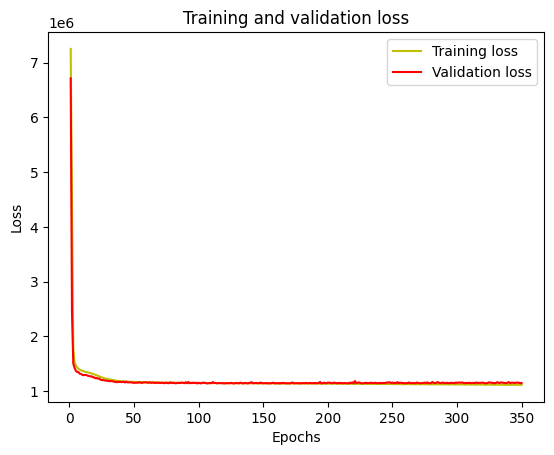

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

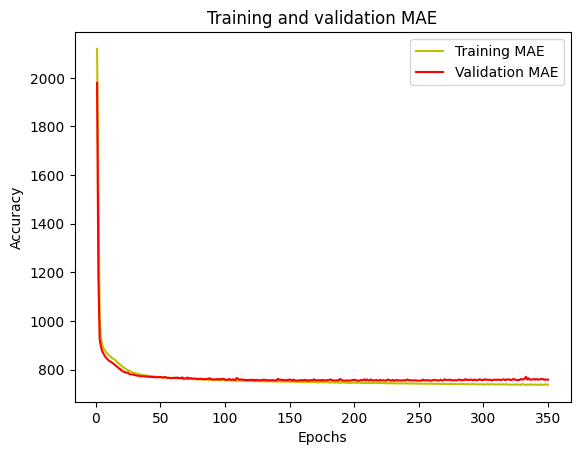

In [ ]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted values are:  [[4367.4473]
 [1356.0464]
 [ 572.1952]
 [2437.4485]
 [4334.9385]]
Real values are:  4454    3410.2276
4743    1605.9096
3017     675.1212
5753    1662.5026
1478    4211.1850
Name: Item_Outlet_Sales, dtype: float64


In [ ]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1256373.0000 - mae: 798.0065
Mean squared error from neural net:  1213517.125
Mean absolute error from neural net:  778.666259765625
